In [88]:
!pip install beautifulsoup4
!pip install nltk
!pip install spacy
!pip install lxml
!pip install html5lib
!pip install ipython
!pip install wordcloud

In [177]:
import bs4 as bs
import urllib.request
import nltk
import spacy
from spacy.matcher import PhraseMatcher
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.training.example import Example
from IPython.core.display import HTML
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import random
import seaborn as sns
import string as st

In [90]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 21.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


## Marcação POS

In [91]:
pln = spacy.load('pt_core_news_sm')
pln

In [92]:
#Processar texto
documento = pln('Estou aprendendo processamento de linguagem natural')

In [93]:
type(documento)

spacy.tokens.doc.Doc

In [94]:
#percorrendo as palavras toke
for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ


## Lematização e stemização

In [95]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural


In [96]:
doc = pln('encontre encontraram encontrarão')
[token.lemma_ for token in doc]

['encontre', 'encontrar', 'encontrar']

In [97]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/nunesfi/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [98]:
# extrair radical em portugues
stremer = nltk.stem.RSLPStemmer()
stremer.stem('aprender')

'aprend'

In [99]:
for token in documento:
    print(token.text, token.lemma_, stremer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur


## CArregamento de Textos

In [100]:
#Acessando site da Wikipédia

dados = 'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'
response = urllib.request.urlopen(dados)
html = response.read().decode('utf-8')

In [101]:
dados_html = bs.BeautifulSoup(html)
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature

In [102]:
#Procurar os textos no html
paragrafos = dados_html.find_all('p')

In [103]:
len(paragrafos)

64

In [104]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [105]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [106]:
conteudo = conteudo.lower()
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

## Busca em textos com Spacy

In [107]:
pln = spacy.load('pt_core_news_sm')
pln

In [108]:
string = 'turing'
token_pesquisa = pln(string)

In [109]:
#Busca em textos
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [110]:
#Qtde de vezes q foi encontrado a palavra escolhida
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

In [111]:
#Buscando os próximos 5 caracteres no texto
doc[3463:3464 + 5]

turing foi o que se chamou

In [112]:
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'''<p><strong>Resultados encontrados</strong> {len(matches)}</p>'''))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto += "<br /><br />"
display(HTML(f"""...{texto}..."""))

## Extração de entidade nomeadas

In [113]:
for entidades in doc.ents:
    print(entidades.text, entidades.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [114]:
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras

In [115]:
doc = pln(conteudo)
lista_token = []

for token in doc:
    lista_token.append(token.text)

In [116]:
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [117]:
sem_stop

['inteligência',
 'artificial',
 '(',
 'sigla',
 ':',
 'ia',
 ';',
 'inglês',
 ':',
 'artificial',
 'intelligence',
 ',',
 'sigla',
 ':',
 'ai',
 ')',
 'campo',
 'estudo',
 'multidisciplinar',
 'abrange',
 'varias',
 'áreas',
 'conhecimento.[1][2',
 ']',
 'conjunto',
 'tecnologias',
 'permitem',
 'aparelhos',
 'smart',
 'executarem',
 'várias',
 'funções',
 'avançadas',
 'modo',
 'quase',
 'autônomo,[2][3',
 ']',
 'representanto',
 'marco',
 'histórico',
 'computação',
 'moderna.[3',
 ']',
 'desenvolvimento',
 'tenha',
 'avançado',
 'ciência',
 'computação',
 ',',
 'abordagem',
 'interdisciplinar',
 'envolve',
 'contribuições',
 'diversas',
 'disciplina',
 '.',
 '\n',
 'principais',
 'áreas',
 'relacionadas',
 'ia',
 'incluem',
 ':',
 '\n',
 'difícil',
 'definir',
 'especificamente',
 'inteligência',
 'artificial',
 ',',
 'longo',
 'seguiu',
 'linhas',
 'pensamento:[1',
 ']',
 '\n',
 'conceito',
 'amplo',
 'recebe',
 'tantas',
 'definições',
 'significados',
 'diferentes',
 'palavra',


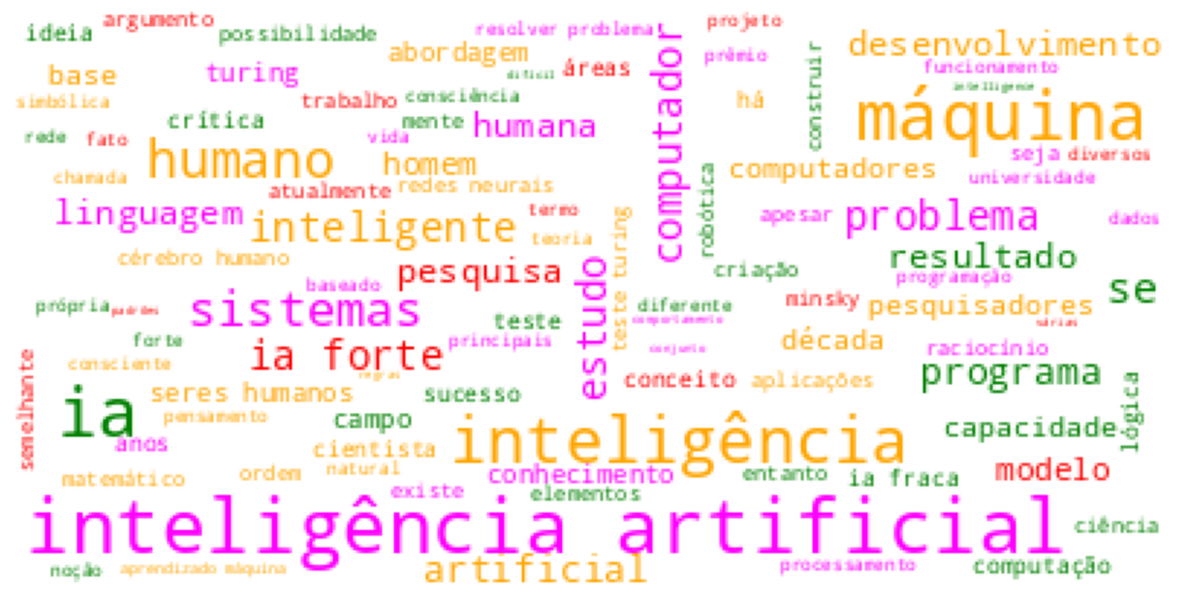

In [118]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
cloud = WordCloud(background_color = 'white', max_words = 100, colormap = color_map)
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [119]:
# Remoção do stopwords
print(STOP_WORDS)

{'pegar', 'tu', 'mas', 'põem', 'é', 'conhecida', 'sabe', 'ao', 'nesta', 'quero', 'apenas', 'vindo', 'questão', 'me', 'qualquer', 'eu', 'porque', 'agora', 'mesmo', 'tanto', 'terceira', 'pelo', 'parece', 'dizem', 'aquilo', 'estivemos', 'primeira', 'daquela', 'quinze', 'dezanove', 'saber', 'sistema', 'tua', 'aqui', 'dessa', 'são', 'vai', 'desta', 'estou', 'quinto', 'nove', 'tentei', 'maiorias', 'dois', 'comprida', 'vossas', 'menos', 'maior', 'segunda', 'seus', 'aí', 'fazemos', 'vossos', 'treze', 'usa', 'fazeis', 'era', 'dão', 'também', 'tivemos', 'oitavo', 'estás', 'momento', 'essa', 'uns', 'uma', 'custa', 'elas', 'que', 'atrás', 'lado', 'segundo', 'quatro', 'conselho', 'quem', 'cento', 'aos', 'nem', 'zero', 'vossa', 'sob', 'vinte', 'pouco', 'corrente', 'próximo', 'local', 'suas', 'ter', 'possível', 'ela', 'inicio', 'estão', 'como', 'fui', 'próxima', 'mil', 'assim', 'deve', 'usar', 'nuns', 'breve', 'novas', 'próprio', 'as', 'outros', 'teu', 'minhas', 'tente', 'naquela', 'fazer', 'têm', 's

## Spacy

In [122]:
## Carregamento da base de dados
base = pd.read_csv('/home/nunesfi/Desktop/IA/files/Bases de dados-20230823T013645Z-001/Bases de dados/base_treinamento.txt', encoding='utf-8')
base

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


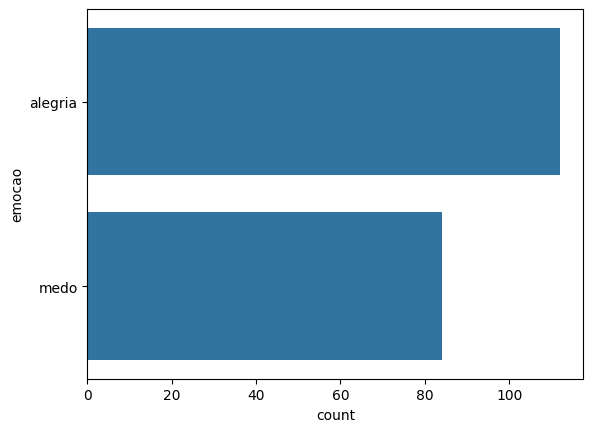

In [123]:
# contagem de registros por classe
sns.countplot(base['emocao'], label = 'Contagem');

In [127]:
#Pré-processamento

pontuacoes = st.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
stop_words = STOP_WORDS
print(stop_words)

{'pegar', 'tu', 'mas', 'põem', 'é', 'conhecida', 'sabe', 'ao', 'nesta', 'quero', 'apenas', 'vindo', 'questão', 'me', 'qualquer', 'eu', 'porque', 'agora', 'mesmo', 'tanto', 'terceira', 'pelo', 'parece', 'dizem', 'aquilo', 'estivemos', 'primeira', 'daquela', 'quinze', 'dezanove', 'saber', 'sistema', 'tua', 'aqui', 'dessa', 'são', 'vai', 'desta', 'estou', 'quinto', 'nove', 'tentei', 'maiorias', 'dois', 'comprida', 'vossas', 'menos', 'maior', 'segunda', 'seus', 'aí', 'fazemos', 'vossos', 'treze', 'usa', 'fazeis', 'era', 'dão', 'também', 'tivemos', 'oitavo', 'estás', 'momento', 'essa', 'uns', 'uma', 'custa', 'elas', 'que', 'atrás', 'lado', 'segundo', 'quatro', 'conselho', 'quem', 'cento', 'aos', 'nem', 'zero', 'vossa', 'sob', 'vinte', 'pouco', 'corrente', 'próximo', 'local', 'suas', 'ter', 'possível', 'ela', 'inicio', 'estão', 'como', 'fui', 'próxima', 'mil', 'assim', 'deve', 'usar', 'nuns', 'breve', 'novas', 'próprio', 'as', 'outros', 'teu', 'minhas', 'tente', 'naquela', 'fazer', 'têm', 's

In [129]:
len(stop_words)

416

In [130]:
# Carregando modelo spacy
pln = spacy.load('pt_core_news_sm')

In [140]:
def processamento(texto):
    texto = texto.lower()
    documento = pln(texto)

    lista = []
    for token in documento:
        lista.append(token.lemma_)

    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
    return lista

In [141]:
texto = processamento('Meu nome é Filipi Nunes e estou fazendo curso de Machine Learning em São Paulo')
texto

'nome filipi nune curso Machine learning São Paulo'

## Pré processamento da base de dados

In [145]:
#limpeza dos textos
base['texto'] = base['texto'].apply(processamento)

In [146]:
base.head()

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria


In [149]:
base_dados_final = []

for texto, emocao in zip(base['texto'], base['emocao']):
    #print(texto, emocao)
    if emocao == 'alegria':
        dic = ({'ALEGRIA': True, 'MEDO': False})
    elif emocao == 'medo':
        dic = ({'ALEGRIA': False, 'MEDO': True})
    
    base_dados_final.append([texto, dic.copy()])

In [154]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

In [181]:
# Criação do Classificador
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat_multilabel')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe('textcat_multilabel', name='categorias')
historico = []

exemplos_iniciais = [
    Example.from_dict(modelo.make_doc("maravilha de o mundo"), {"cats": {"ALEGRIA": True, "MEDO": False}}),
    Example.from_dict(modelo.make_doc("apavorar"), {"cats": {"ALEGRIA": False, "MEDO": True}}),
]    
categorias.initialize(lambda: exemplos_iniciais)

In [182]:
#Treinamento
modelo.begin_training()
for epoca in range(1000):
    #mistura de dados
    random.shuffle(base_dados_final)
    losses = {}
    # enviar para treinamento batchs de 30 textos
    for batch in spacy.util.minibatch(base_dados_final, 30):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        modelo.update(textos, annotations, losses=losses)
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

ValueError: [E143] Labels for component 'categorias' not initialized. This can be fixed by calling add_label, or by providing a representative batch of examples to the component's `initialize` method.